# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 observational trends:

1.  Temputures seem to have clear coorelations to latitude.
2.  The weather bocomes warmer as one approaches the equator (0 degree latitude).
3.  No strong coorelation between wind speed and cloudiness in Northern Cities. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)
        


# Print the city count to confirm sufficient count
len(cities)


614

In [3]:
cities_df = pd.DataFrame(cities,columns=["City"])
cities_df.head()


,City
0,arraial do cabo
1,port elizabeth
2,barentsburg
3,the pas
4,amderma




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Define Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# building URL by adding Key and query (not query values - yet)
query_url = f"{base_url}appid={weather_api_key}&q="
print("Beginning Data Retrieval")
print("-----------------------------")
count = 0
set_count = 1
for index, row in cities_df.iterrows():
    city_name = row["City"]
    weather_response = requests.get(query_url + city_name)
    weather_json = weather_response.json()
    count +=1
    if count == 50:
        count = 1 # WHY NOT WORKING?
        set_count += 1
    try:
        print(f"Processing Record {count} of Set {set_count}| {city_name}")
        cities_df.loc[index,'Lat'] = weather_json['coord']['lat']
        cities_df.loc[index,'Lng'] = weather_json['coord']['lon']
        cities_df.loc[index,'Max Temp'] = weather_json['main']['temp_max']
        cities_df.loc[index,'Humidity'] = weather_json['main']['humidity']
        cities_df.loc[index,'Cloudiness'] = weather_json['clouds']['all']
        cities_df.loc[index,'Wind Speed'] = weather_json['wind']['speed']
        cities_df.loc[index,'Country'] = weather_json['sys']['country']
        cities_df.loc[index,'Date'] = weather_json['dt']
    except (KeyError, IndexError):
        print(f"City not found, skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| arraial do cabo
Processing Record 2 of Set 1| port elizabeth
Processing Record 3 of Set 1| barentsburg
City not found, skipping...
Processing Record 4 of Set 1| the pas
Processing Record 5 of Set 1| amderma
City not found, skipping...
Processing Record 6 of Set 1| new norfolk
Processing Record 7 of Set 1| chokurdakh
Processing Record 8 of Set 1| butaritari
Processing Record 9 of Set 1| berlevag
Processing Record 10 of Set 1| rondonopolis
Processing Record 11 of Set 1| belmonte
Processing Record 12 of Set 1| kulhudhuffushi
Processing Record 13 of Set 1| padilla
Processing Record 14 of Set 1| hithadhoo
Processing Record 15 of Set 1| santa marinella
Processing Record 16 of Set 1| niteroi
Processing Record 17 of Set 1| port hardy
Processing Record 18 of Set 1| buala
Processing Record 19 of Set 1| calabar
Processing Record 20 of Set 1| port alfred
Processing Record 21 of Set 1| bethel
Processing Record 22 o

Processing Record 41 of Set 4| cockburn harbour
City not found, skipping...
Processing Record 42 of Set 4| nanakuli
Processing Record 43 of Set 4| la asuncion
Processing Record 44 of Set 4| ostersund
Processing Record 45 of Set 4| bubaque
Processing Record 46 of Set 4| hit
Processing Record 47 of Set 4| coquimbo
Processing Record 48 of Set 4| chuy
Processing Record 49 of Set 4| belogorsk
Processing Record 1 of Set 5| semirom
Processing Record 2 of Set 5| avarua
Processing Record 3 of Set 5| mecca
Processing Record 4 of Set 5| progreso
Processing Record 5 of Set 5| la ronge
Processing Record 6 of Set 5| ladnun
Processing Record 7 of Set 5| kristianstad
Processing Record 8 of Set 5| severnyy
Processing Record 9 of Set 5| sinkat
City not found, skipping...
Processing Record 10 of Set 5| svilajnac
Processing Record 11 of Set 5| abong mbang
Processing Record 12 of Set 5| tiksi
Processing Record 13 of Set 5| louisbourg
City not found, skipping...
Processing Record 14 of Set 5| kenai
Processi

Processing Record 38 of Set 8| ati
Processing Record 39 of Set 8| pangody
Processing Record 40 of Set 8| jasper
Processing Record 41 of Set 8| amahai
Processing Record 42 of Set 8| corinto
Processing Record 43 of Set 8| janauba
Processing Record 44 of Set 8| show low
Processing Record 45 of Set 8| aklavik
Processing Record 46 of Set 8| colac
Processing Record 47 of Set 8| baiyin
Processing Record 48 of Set 8| broken hill
Processing Record 49 of Set 8| okato
Processing Record 1 of Set 9| san jose
Processing Record 2 of Set 9| bloomingdale
Processing Record 3 of Set 9| grand river south east
City not found, skipping...
Processing Record 4 of Set 9| ondjiva
Processing Record 5 of Set 9| pitimbu
Processing Record 6 of Set 9| yershov
Processing Record 7 of Set 9| inyonga
Processing Record 8 of Set 9| brainerd
Processing Record 9 of Set 9| magaria
Processing Record 10 of Set 9| ahipara
Processing Record 11 of Set 9| iqaluit
Processing Record 12 of Set 9| andros town
Processing Record 13 of S

Processing Record 36 of Set 12| fort nelson
Processing Record 37 of Set 12| fernandopolis
Processing Record 38 of Set 12| batie
Processing Record 39 of Set 12| rajpipla
Processing Record 40 of Set 12| tobol
Processing Record 41 of Set 12| asuncion
Processing Record 42 of Set 12| zhangjiakou
Processing Record 43 of Set 12| lindi
Processing Record 44 of Set 12| baruun-urt
Processing Record 45 of Set 12| coruripe
Processing Record 46 of Set 12| breytovo
Processing Record 47 of Set 12| matay
Processing Record 48 of Set 12| hasaki
Processing Record 49 of Set 12| armidale
Processing Record 1 of Set 13| solnechnyy
Processing Record 2 of Set 13| ramsar
Processing Record 3 of Set 13| kingman
Processing Record 4 of Set 13| tilichiki
Processing Record 5 of Set 13| colares
Processing Record 6 of Set 13| xichang
Processing Record 7 of Set 13| havre-saint-pierre
Processing Record 8 of Set 13| rocha
Processing Record 9 of Set 13| whitehorse
Processing Record 10 of Set 13| qasigiannguit
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Max Temp"] = ((cities_df["Max Temp"] -273.15) * 9/5 +32) #converting Kelvin to Fahrenheit # Also could have used units = imperial method
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])
cities_df["Date"] = pd.to_datetime(cities_df["Date"], unit = "s")
cities_df['Date'] = pd.to_datetime(cities_df['Date']) 
cities_df['Date'] = cities_df['Date'].dt.strftime('%m-%d-%Y') 

cities_df_no_null = cities_df.dropna(how = "any")
cities_df_no_null.to_csv("city_weather.csv", index=False)
cities_df_no_null



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.97,-42.03,77.000,83.0,82.0,6.70,BR,08-18-2020
1,port elizabeth,-33.92,25.57,51.800,81.0,59.0,12.30,ZA,08-18-2020
3,the pas,53.83,-101.25,78.800,61.0,1.0,2.99,CA,08-18-2020
5,new norfolk,-42.78,147.06,41.000,83.0,57.0,0.95,AU,08-18-2020
6,chokurdakh,70.63,147.92,33.800,92.0,59.0,2.75,RU,08-18-2020
...,...,...,...,...,...,...,...,...,...
608,olafsvik,64.89,-23.71,56.120,81.0,0.0,5.23,IS,08-18-2020
610,achhnera,27.18,77.77,89.870,64.0,10.0,2.73,IN,08-18-2020
611,sovetskaya gavan,48.97,140.29,60.908,91.0,98.0,2.56,RU,08-18-2020
612,bay roberts,47.60,-53.26,60.998,47.0,100.0,8.66,CA,08-18-2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df[cities_df["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#Get the indices of cities that have humidity over 100%.
clean_df = cities_df[cities_df["Humidity"]<100]
clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.97,-42.03,77.000,83.0,82.0,6.70,BR,08-18-2020
1,port elizabeth,-33.92,25.57,51.800,81.0,59.0,12.30,ZA,08-18-2020
3,the pas,53.83,-101.25,78.800,61.0,1.0,2.99,CA,08-18-2020
5,new norfolk,-42.78,147.06,41.000,83.0,57.0,0.95,AU,08-18-2020
6,chokurdakh,70.63,147.92,33.800,92.0,59.0,2.75,RU,08-18-2020
...,...,...,...,...,...,...,...,...,...
608,olafsvik,64.89,-23.71,56.120,81.0,0.0,5.23,IS,08-18-2020
610,achhnera,27.18,77.77,89.870,64.0,10.0,2.73,IN,08-18-2020
611,sovetskaya gavan,48.97,140.29,60.908,91.0,98.0,2.56,RU,08-18-2020
612,bay roberts,47.60,-53.26,60.998,47.0,100.0,8.66,CA,08-18-2020


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

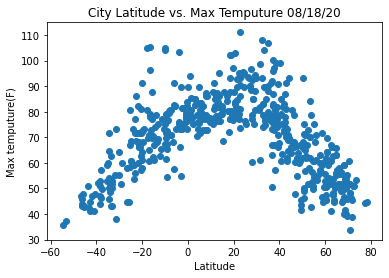

In [10]:
max_temp = clean_df["Max Temp"]
Lat_df = clean_df["Lat"]
plt.scatter(Lat_df, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Max temputure(F)')
plt.title("City Latitude vs. Max Temputure 08/18/20")
plt.show()

As latitude approaches 0 degrees max temputures rise.

## Latitude vs. Humidity Plot

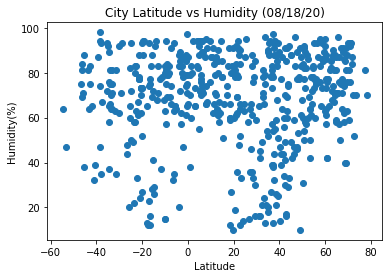

In [11]:
hum_df = clean_df["Humidity"]
Lat_df = clean_df["Lat"]
plt.scatter(Lat_df, hum_df)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity (08/18/20)")
plt.show()

The coorelation between humidity and latitude is not apparent.  

## Latitude vs. Cloudiness Plot

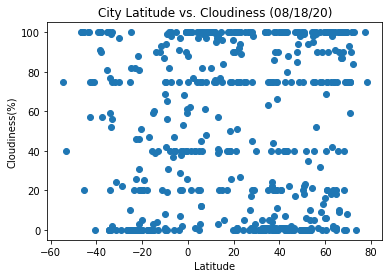

In [12]:
cloud_df = clean_df["Cloudiness"]
Lat_df = clean_df["Lat"]
plt.scatter(Lat_df, cloud_df)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness (08/18/20)")
plt.show() 

The coorelation between cloudiness and latitude is not apparent.

## Latitude vs. Wind Speed Plot

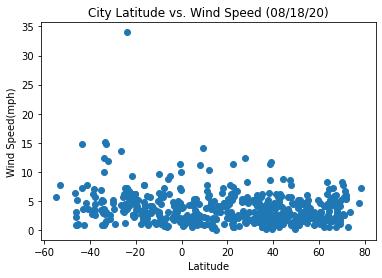

In [13]:
windspeed_df = clean_df["Wind Speed"]
Lat_df = clean_df["Lat"]
plt.scatter(Lat_df, windspeed_df)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs. Wind Speed (08/18/20)")
plt.show() 

Wind speeds under 10 (mph) is spread across most latitudes.  

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.5278713024984569


Text(40, 100, 'y = -0.55x + 92.11')

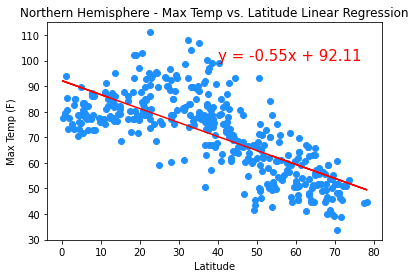

In [23]:
north_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(40,100),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.5278713024984569


Text(40, 100, 'y = -0.55x + 92.11')

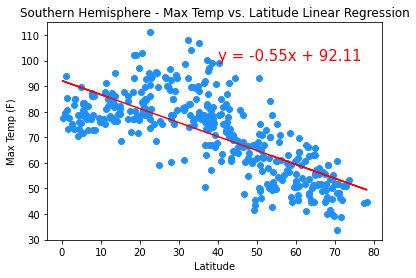

In [24]:
south_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(south_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(40,100),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.0007976770383112366


Text(40, 20, 'y = 0.03x + 69.07')

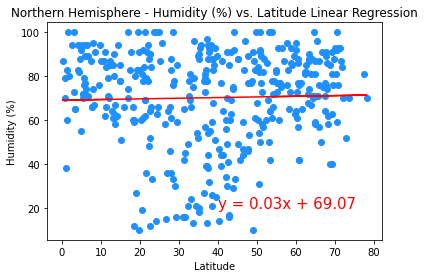

In [26]:
north_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(40,20),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.0007976770383112366


2

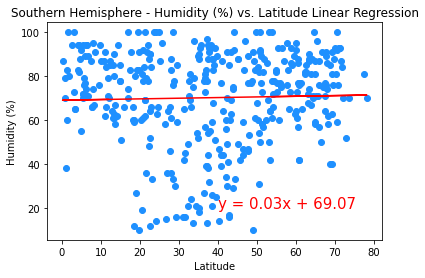

In [30]:
south_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(40,20),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
2

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.0019031579929780953


Text(20, 60, 'y = -0.09x + 56.32')

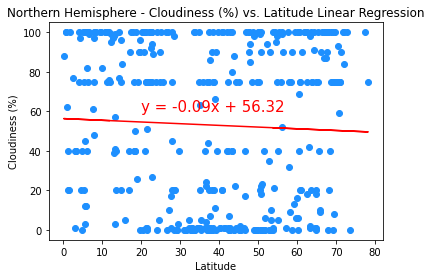

In [18]:
north_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(20,60),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.0019031579929780953


Text(20, 60, 'y = -0.09x + 56.32')

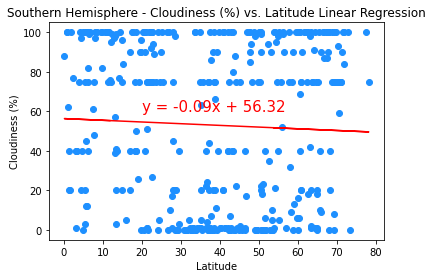

In [19]:
south_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(20,60),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.000125904828652334


Text(20, 13, 'y = 0.0x + 3.25')

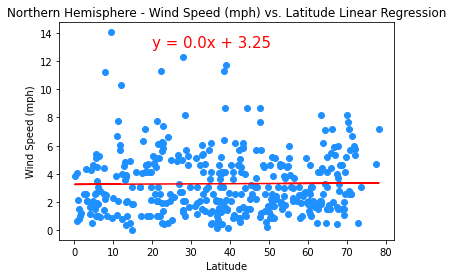

In [31]:
north_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(20,13),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.000125904828652334


Text(20, 13, 'y = 0.0x + 3.25')

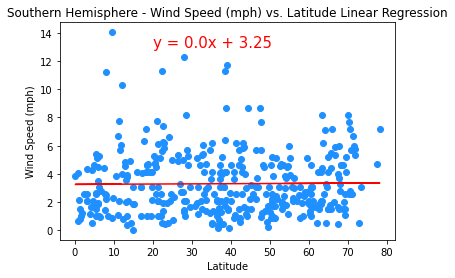

In [22]:
south_hem = cities_df_no_null.loc[cities_df_no_null['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(20,13),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
